# Part 1: Classification

A common task in computational research is to classify an object based on a set of features. In superivsed machine learning, we can give an algorithm a dataset of training examples that say "here are specific features, and this is the class it belongs to". With enough training examples, a model can be built that recognizes important features in determining an objects class. This model can then be used to predict the class of an object given its known features.

## 1) Cancer Dataset

We'll start off by loading scikit-learn's [Breast Cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) dataset. Using this dataset we can classify a cancer as one of two types: malignant or benign.

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
type(cancer)

sklearn.utils.Bunch

Let's look inside of it to see what datatypes scikit-learn wants, and how their sample dataset is formatted, so that we can prepare our own datasets later:

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

So the data is in dictionary format, and we can access the data and labels by indexing certain keys:

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Again, here are the features:

In [ ]:
print(cancer.feature_names)
print(len(cancer.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


And here's what we're predicting:

In [ ]:
print(cancer.target_names)
print(len(cancer.target_names))

['malignant' 'benign']
2


So we are using 30 features for each observation, trying to classfiy each observation into one of two categories, using only those 30 features. How are these input features formatted?

In [ ]:
print(len(cancer.data))
print(type(cancer.data))
cancer.data[0:5]

569
<class 'numpy.ndarray'>


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

We have a large numpy array of length 569, one for each observation, and each observation has its own numpy array of length 30, one for each feature. Each inner array *must* lineup with the order of the variables *and* all other arrays. **ORDER MATTERS**.

What about the prediction?

In [ ]:
print(len(cancer.target))
print(type(cancer.target))
cancer.target

569
<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Again, we have 569 observations, but *no* sub arrays. The target data is one dimension. Order matters here as well, they should correspond to the feature indices in the data array. These are the correct class corresponding to the data arrays.

In other words, the data and the targets should match up like this for three of the observations:

In [ ]:
for x in [0, 50, 100]:
    print("Data:", cancer.data[x])
    print("Target:", cancer.target[x])

Data: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
Target: 0
Data: [1.176e+01 2.160e+01 7.472e+01 4.279e+02 8.637e-02 4.966e-02 1.657e-02
 1.115e-02 1.495e-01 5.888e-02 4.062e-01 1.210e+00 2.635e+00 2.847e+01
 5.857e-03 9.758e-03 1.168e-02 7.445e-03 2.406e-02 1.769e-03 1.298e+01
 2.572e+01 8.298e+01 5.165e+02 1.085e-01 8.615e-02 5.523e-02 3.715e-02
 2.433e-01 6.563e-02]
Target: 1
Data: [1.361e+01 2.498e+01 8.805e+01 5.827e+02 9.488e-02 8.511e-02 8.625e-02
 4.489e-02 1.609e-01 5.871e-02 4.565e-01 1.290e+00 2.861e+00 4.314e+01
 5.872e-03 1.488e-02 2.647e-02 9.921e-03 1.465e-02 2.355e-03 1.699e+01
 3.527e+01 1.086e+02 9.065e+02 1.265e-01 1.943e-01 3.169e-01 1.184e-01
 2.651e-01 7.397e-02]
Target: 0


This should be enough explanation to be able to get your own data from CSV or other formats into the correct numpy arryays for scikit-learn.

Now we split the data into training and testing, but first thing's first: **set the random seed!**. This is very important for reproducibility of your analyses.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

np.random.seed(10)

Here we'll use 75% of the data for training, and test on the remaining 25%.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25)

In [ ]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

The output variable (species) is equally distributed across our data points, meaning that there are the same name number of data points (50) for each of the three possible output variable values (setosa, versicolor, virginica) 

Now that we've split our data up into `train` and `test` sets, let's look to see how the output variable is distributed within the two datasets.

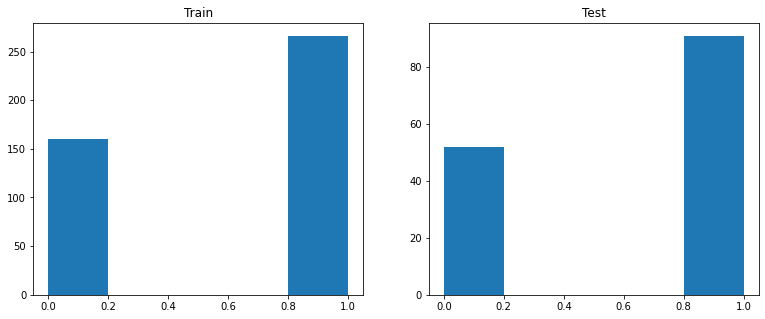

In [ ]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.hist(y_train, bins=5)
plt.title('Train')
plt.subplot(1,2,2)
plt.hist(y_test, bins=5);
plt.title('Test');

The two possible values of the output variable are no longer equally distributed. This can cause a problem for model performance. Fortunately we can tell `sklearn` to split them equally using the `stratify` parameter as follows:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.20,
                                                   stratify=cancer.target)

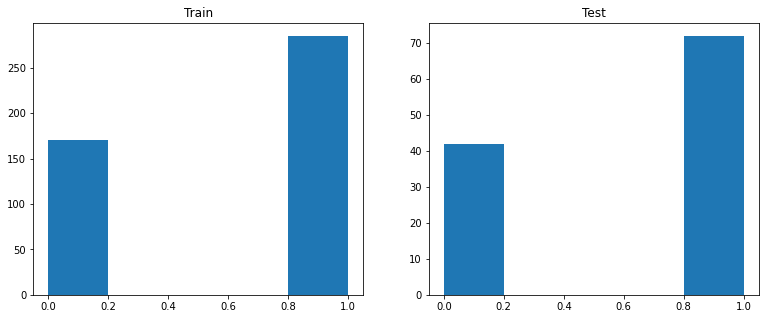

In [ ]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.hist(y_train, bins=5)
plt.title('Train')
plt.subplot(1,2,2)
plt.hist(y_test, bins=5);
plt.title('Test');

That's better, they are all equal now!

## 2) Decision Trees

The first model we're going to explore is [Decision Trees: Classification](http://scikit-learn.org/stable/modules/tree.html#classification).

After the train/test split, scikit-learn makes the rest of the process relatively easy, since it already has a DT classifier algorith for us, we just have to decide on the parameters:

In [ ]:
from sklearn import tree

dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

Then we use the `fit` method on the train data to fit our model. The syntax is a little strange at first, but it's powerful. All the functions for fitting data, making predictions, and storing parameters are encapsulated in a single model object. 

In [ ]:
dt_classifier.fit(X_train, y_train);

To see how our model performs on the test data, we use the `score` method which returns the mean accuracy. Accuracy can be defined as:

$$ Accuracy= $\frac{\sum{\text{True Positives}}+\sum{\text{True Negatives}}}{\sum{\text{Total Population}}}$$

Where "True Positives" are those data points whose value should be 1, and they are predicted to be 1, and "True Negatives" are those data points whose values should be -1 (or 0), and they are predicted to be -1 (or 0).

`score` can be used on both the train and test datasets. Using the train data will give us the in-sample accurac score.

In [ ]:
print(dt_classifier.score(X_train, y_train))

1.0


That's a perfect score of `1.0`! But the model may be overfit to the train data, so we should evaluate the performance of this model using the test data.

In [ ]:
print(dt_classifier.score(X_test, y_test))

0.956140350877193


Not quite perfect, but still really good!

We can get the feature importance (Gini importance) of the four features to see which one(s) are important in determining the classification:

In [ ]:
dt_classifier.feature_importances_

array([0.01126935, 0.04904254, 0.        , 0.        , 0.        ,
       0.01486928, 0.02126154, 0.        , 0.        , 0.        ,
       0.00907433, 0.        , 0.        , 0.00299427, 0.00145473,
       0.        , 0.        , 0.        , 0.        , 0.00782594,
       0.        , 0.02578757, 0.        , 0.71239461, 0.        ,
       0.00845201, 0.01623836, 0.11933547, 0.        , 0.        ])

Looks like the twenty-fourth variable is most important, with a Gini importance score of ~`0.71`. Let's find out which feature that is.

In [ ]:
cancer.feature_names[dt_classifier.feature_importances_.argmax()]

'worst area'

There are  metrics other than accuracy to quantify classification performance. Some common metrics in machine learning are:

1. **Precision**: 
$$\frac{\sum{\text{Predicted Positives}}}{\sum{\text{True Positives}}}$$
2. **Recall** (or **Sensitivity**): 
$$\frac{\sum{\text{Predicted Positives}}}{\sum{\text{Condition Positives}}}$$ 
3. **Specificity** (like recall for negative examples): 
$$\frac{\sum{\text{Predicted Negatives}}}{\sum{\text{Condition Negatives}}}$$


Below is a table showing how these metrics fit in with other confusion matrix concepts like "True Positives" and "True Negatives" [wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

<img src='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg' width=300>/

Scikit-learn will can print out the **Recall** and **Precision** scores for a classification model by using `metrics.classification_report()`.

In [ ]:
from sklearn import metrics

dt_predicted = dt_classifier.predict(X_test)
print("Classification report:")
print(metrics.classification_report(y_test, dt_predicted)) 

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## 3) Tuning Parameters: Cross-Validation & Grid Search

Tuning parameters is one of the most important steps in building a ML model. One way to do this is by using what's called a [grid search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). A grid search tests different possible parameter combinations to see which combination yields the best results. Fortunately, scikit-learn has a function for this which makes it very easy to do.

Here we'll see what the best combination of the parameters `min_samples_split` and `min_samples_leaf` is. We can make a dictionary with the names of the parameters as the keys and the range of values as the corresponding values.

In [ ]:
param_grid = {'min_samples_split': range(2,10),
              'min_samples_leaf': range(1,10)}

param_grid

{'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10)}

Then we can implement the grid search and fit our model according to the best parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

model_dt = GridSearchCV(dt_classifier, param_grid, cv=3, iid=False, return_train_score=True)
model_dt.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


We can see what the model parameters are that produce the highest accuracy on the test set data by finding the max `mean_test_score`, and it's assoiated parameter values:

In [ ]:
best_index = np.argmax(model_dt.cv_results_["mean_test_score"])

print('Best parameter values are:', model_dt.cv_results_["params"][best_index])
print('Best Mean Cross-Validation train accuracy: %.03f' % (model_dt.cv_results_["mean_train_score"][best_index]))
print('Best Mean Cross-Validation test (validation) accuracy: %.03f' % (model_dt.cv_results_["mean_test_score"][best_index]))
print('Overal mean test accuracy: %.03f' % (model_dt.score(X_test, y_test)))

Best parameter values are: {'min_samples_leaf': 8, 'min_samples_split': 2}
Best Mean Cross-Validation train accuracy: 0.959
Best Mean Cross-Validation test (validation) accuracy: 0.914
Overal mean test accuracy: 0.956


We can also look at all of the combinations and their test and train scores:

In [ ]:
#model_dt

In [ ]:
n_grid_points = len(model_dt.cv_results_['params'])
min_samples_leaf_vals = np.empty((n_grid_points,))
min_samples_split_vals = np.empty((n_grid_points,))
mean_train_scores = np.empty((n_grid_points,))
mean_test_scores = np.empty((n_grid_points,))
for i in range(n_grid_points):
    min_samples_leaf_vals[i] = model_dt.cv_results_['params'][i]['min_samples_leaf']
    min_samples_split_vals[i] = model_dt.cv_results_['params'][i]['min_samples_split']
    mean_train_scores[i] = model_dt.cv_results_['mean_train_score'][i]
    mean_test_scores[i] = model_dt.cv_results_['mean_test_score'][i]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'min_samples_split')

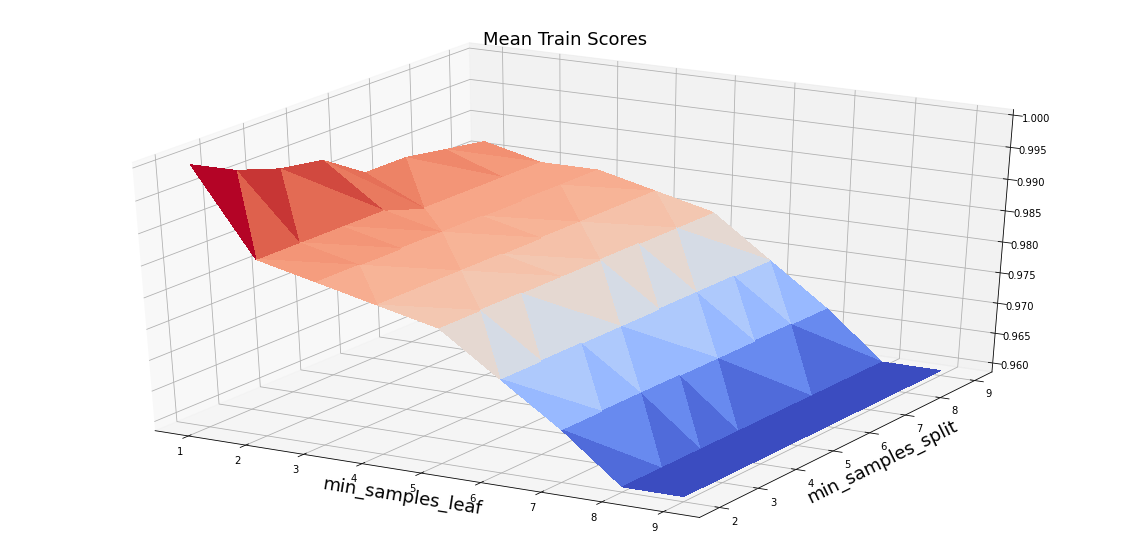

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf( min_samples_leaf_vals, min_samples_split_vals, mean_train_scores, cmap=cm.coolwarm,
                       linewidth=10, antialiased=False)
ax.set_title('Mean Train Scores', fontsize=18)
ax.set_xlabel('min_samples_leaf', fontsize=18)
ax.set_ylabel('min_samples_split', fontsize=18)

Text(0.5, 0, 'min_samples_split')

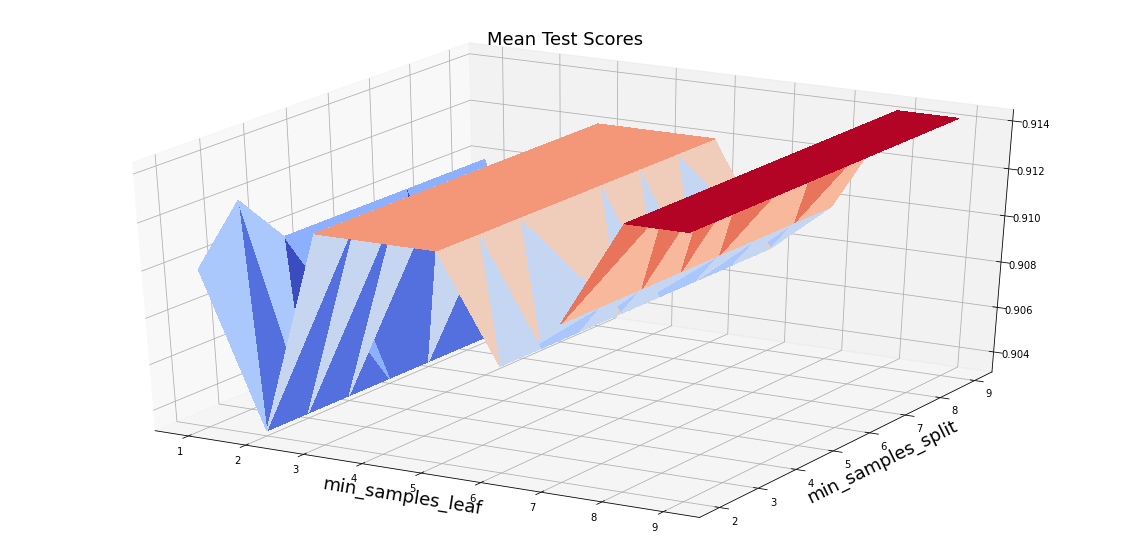

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf( min_samples_leaf_vals, min_samples_split_vals, mean_test_scores, cmap=cm.coolwarm,
                       linewidth=10, antialiased=False)
ax.set_title('Mean Test Scores', fontsize=18)
ax.set_xlabel('min_samples_leaf', fontsize=18)
ax.set_ylabel('min_samples_split', fontsize=18)

## 4) Random Forests

Now we'll look at [Random Forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

- random forests are an ensemble method (the classification decision is pooled across many simpler classifiers)
- each decision tree is fit to a subset of the data (bagging), and uses only a subset of the features (random subspace). 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble

rf_classifier = ensemble.RandomForestClassifier(n_estimators=10,  # number of trees
                       criterion='gini',  # or 'entropy' for information gain
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features='auto',  # number of features for best split
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07,  # early stopping
                       n_jobs=1,  # CPUs to use
                       random_state = 10,  # random seed
                       class_weight="balanced")  # adjusts weights inverse of freq, also "balanced_subsample" or None

Now we fit the model on our training data.

In [ ]:
rf_model = rf_classifier.fit(X_train, y_train)

Let's look at the classification performance on the test data:

In [ ]:
print("Score of model with test data defined above:")
print(rf_model.score(X_test, y_test))
print()

predicted = rf_model.predict(X_test)
print("Classification report:")
print(metrics.classification_report(y_test, predicted)) 
print()

Score of model with test data defined above:
0.9649122807017544

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114




Let's do another grid search to determine the best parameters:

In [ ]:
param_grid = {'min_samples_split': range(2,10),
              'min_samples_leaf': range(1,10)}

model_rf = GridSearchCV(ensemble.RandomForestClassifier(n_estimators=10), param_grid, cv=3, iid=False)
model_rf.fit(X_train, y_train)

best_index = np.argmax(model_rf.cv_results_["mean_test_score"])

print("Best parameter values:", model_rf.cv_results_["params"][best_index])
print("Best Mean cross-validated test accuracy:", model_rf.cv_results_["mean_test_score"][best_index])
print("Overall Mean test accuracy:", model_rf.score(X_test, y_test))

Best parameter values: {'min_samples_leaf': 1, 'min_samples_split': 2}
Best Mean cross-validated test accuracy: 0.9582026257697223
Overall Mean test accuracy: 0.9649122807017544


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


## 5) Predict

Great! That's quite accurate. So let's say we're walking through a garden and spot an iris, but have no idea what type it is. We take some measurements:

In [ ]:
import random as rand
random_cancer = [rand.uniform(0.001, 0.1) for i in range(30)]

for i in range(len(random_cancer)):
    print(cancer.feature_names[i])
    print(random_cancer[i])
    print()

mean radius
0.06220009898336059

mean texture
0.09064469569331858

mean perimeter
0.08036465267316367

mean area
0.014037772375830183

mean smoothness
0.018244736801124758

mean compactness
0.03056035208780637

mean concavity
0.08413481195286286

mean concave points
0.07381020573042951

mean symmetry
0.0584056735592032

mean fractal dimension
0.07467366325333241

radius error
0.06951140153016998

texture error
0.030669767290647795

perimeter error
0.08501562575776951

area error
0.09395975688195177

smoothness error
0.02412946290395539

compactness error
0.06013494062591147

concavity error
0.05943643291198535

concave points error
0.02139275709102242

symmetry error
0.09960822265353085

fractal dimension error
0.07854524348440059

worst radius
0.012211202225034367

worst texture
0.023094277876640583

worst perimeter
0.04464384570550168

worst area
0.029638352657526734

worst smoothness
0.0724127781902978

worst compactness
0.05710765174011921

worst concavity
0.07837219674091064

wors

Can we use our model to predict the type?

In [ ]:
label_idx = model_rf.predict([random_cancer])
label_idx

array([1])

Now we can just index our labels:

In [ ]:
cancer.target_names[label_idx]

array(['benign'], dtype='<U9')

# Challenge: AdaBoost

Adaboost is another ensemble method that relies on 'boosting'. Similar to 'bagging', 'boosting' samples many subsets of data to fit multiple classifiers, but resamples preferentially for mis-classified data points. 

### Part 1

Using the scikit-learn [documentation](http://scikit-learn.org/stable/modules/ensemble.html#adaboost), build your own AdaBoost model to test on the iris data set! Start off with `n_estimators` at 100, and `learning_rate` at .5. Use 10 as the `random_state` value.

### Part 2

Now use a grid search to determine what the best values for the `n_estimators` and `learning_rate` parameters are. For `n_estimators` try a range of 50 to 500 with a step of 50, and for `learning_rate` try a range of .1 to 1.1 with a step of .1. For decimal steps in a range use the `np.arange` function.